In [2]:
import torch
import pickle
import numpy as np
from dgl.data import AsNodePredDataset
from ogb.nodeproppred import DglNodePropPredDataset

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load Graph and Labels

In [3]:
dataset = AsNodePredDataset(DglNodePropPredDataset('ogbn-arxiv'))
g = dataset[0]
labels = g.ndata["label"]
train_mask = g.ndata["train_mask"]
val_mask = g.ndata["val_mask"]
test_mask = g.ndata["test_mask"]

### Load CNS Prediction Data

In [4]:
with open("../Correct_And_Smooth_OGB_arxiv/predicted_labels.pickle", "rb") as f:
    y_pred = pickle.load(f).flatten()

In [5]:
y_pred[train_mask.bool()] = labels[train_mask.bool()]
y_pred[val_mask.bool()] = labels[val_mask.bool()]

### Find Class Probability of C & S

In [9]:
class_count = np.vstack(np.unique(y_pred, return_counts=True)).T

add = [[i, 0] for i in range(40) if i not in class_count[:, 0].tolist()]
if add: class_count = np.vstack((class_count, np.array(add)))

class_count = class_count[class_count[:, 0].argsort()]
class_count

array([[    0,   606],
       [    1,   618],
       [    2,  4856],
       [    3,  1813],
       [    4,  5991],
       [    5,  4699],
       [    6,  1269],
       [    7,   569],
       [    8,  5906],
       [    9,  2877],
       [   10,  8401],
       [   11,   587],
       [   12,    28],
       [   13,  2351],
       [   14,   606],
       [   15,   410],
       [   16, 28743],
       [   17,   424],
       [   18,   701],
       [   19,  3022],
       [   20,  2121],
       [   21,   410],
       [   22,  1919],
       [   23,  2739],
       [   24, 20989],
       [   25,  1167],
       [   26,  4805],
       [   27,  4236],
       [   28, 21800],
       [   29,   347],
       [   30, 12428],
       [   31,  2569],
       [   32,   453],
       [   33,  1217],
       [   34,  8108],
       [   35,   115],
       [   36,  3531],
       [   37,  2435],
       [   38,  1510],
       [   39,  1967]])

In [10]:
s = np.sum(1/(np.log(10+class_count[:, 1]) ** 2))

class_proba = 1/(((np.log(10+class_count[:, 1]) ** 2)) )
class_proba

array([0.02423766, 0.02409271, 0.01387336, 0.01773878, 0.01321275,
       0.01398117, 0.0195399 , 0.024712  , 0.01325619, 0.01575086,
       0.01224399, 0.02447585, 0.07557418, 0.0165772 , 0.02423766,
       0.02740877, 0.00948758, 0.02711359, 0.02319046, 0.01555889,
       0.01702353, 0.02740877, 0.01747471, 0.01594631, 0.01009623,
       0.02000194, 0.01390786, 0.01432976, 0.01001978, 0.02894542,
       0.01124899, 0.01620654, 0.02654513, 0.01976863, 0.01234064,
       0.04289523, 0.01497359, 0.01642897, 0.01862992, 0.01736171])

In [11]:
probs = 1 / np.log(10 + class_count[:, 1]) ** 2
probs

array([0.02423766, 0.02409271, 0.01387336, 0.01773878, 0.01321275,
       0.01398117, 0.0195399 , 0.024712  , 0.01325619, 0.01575086,
       0.01224399, 0.02447585, 0.07557418, 0.0165772 , 0.02423766,
       0.02740877, 0.00948758, 0.02711359, 0.02319046, 0.01555889,
       0.01702353, 0.02740877, 0.01747471, 0.01594631, 0.01009623,
       0.02000194, 0.01390786, 0.01432976, 0.01001978, 0.02894542,
       0.01124899, 0.01620654, 0.02654513, 0.01976863, 0.01234064,
       0.04289523, 0.01497359, 0.01642897, 0.01862992, 0.01736171])

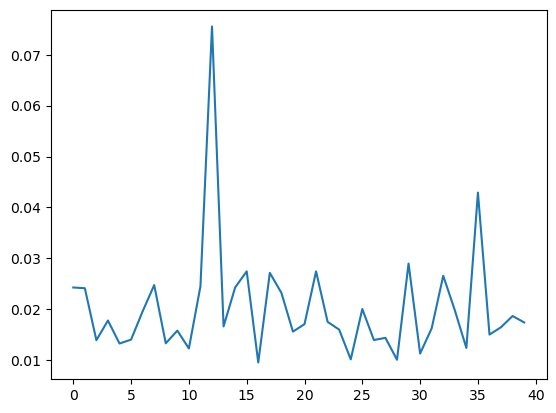

In [12]:
plt.plot(range(probs.shape[0]), probs)
plt.show()

### Histogram Printing Function

In [6]:
def add_lost(h):
    add = [[i, 0] for i in range(40) if i not in h[:, 0].tolist()]
    if add: return np.vstack((h, np.array(add)))
    else: return h

def hist_plotter(labels, pred, train_mask=None, test_mask=None, val_mask=None):
    zoom = 15
    fig, axs = plt.subplots(5, 2, figsize=[16, 13], gridspec_kw={'width_ratios': [2, 1]})
    plt.tight_layout()
    
    data = labels.numpy()
    pred_data = pred.numpy()
    
    # Original Whole Data
    h = np.vstack(np.unique(data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[0][0])
    axs[0][0].set_xticks(ticks=range(h.shape[0]), labels=h[:, 0])
    axs[0][0].set_title("Original Whole Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[0][1])
    axs[0][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])
    
    # Original Train data
    train_data = data[train_mask.bool()]
    h = np.vstack(np.unique(train_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[1][0])
    axs[1][0].set_xticks(ticks=list(range(h.shape[0])), labels=h[:, 0])
    axs[1][0].set_title("Original Train Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[1][1])
    axs[1][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])

    
    # Original Validation data
    val_data = data[val_mask.bool()]
    h = np.vstack(np.unique(val_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[2][0])
    axs[2][0].set_xticks(ticks=range(h.shape[0]), labels=h[:, 0])
    axs[2][0].set_title("Original Validation Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[2][1])
    axs[2][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])
    
    
    # Original Test data
    test_data = data[test_mask.bool()]
    h = np.vstack(np.unique(test_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[3][0])
    axs[3][0].set_xticks(ticks=sorted(h[:, 0].tolist()), labels=h[:, 0])
    axs[3][0].set_title("Original Test Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[3][1])
    axs[3][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])
    
    
    # Prediction Test data
    test_data = pred_data[test_mask.bool()]
    h = np.vstack(np.unique(test_data, return_counts=True)).T
    h = h[(h[:, 1] * -1).argsort()]
    h = add_lost(h)
    sns.barplot(x=list(range(h.shape[0])), y=h[:, 1], ax=axs[4][0])
    axs[4][0].set_xticks(ticks=sorted(h[:, 0].tolist()), labels=h[:, 0])
    axs[4][0].set_title("Predicted Test Data")
    
    sns.barplot(x=list(range(zoom)), y=h[-zoom:, 1], ax=axs[4][1])
    axs[4][1].set_xticks(ticks=list(range(zoom)), labels=h[-zoom:, 0])

### Histogram for Original Data

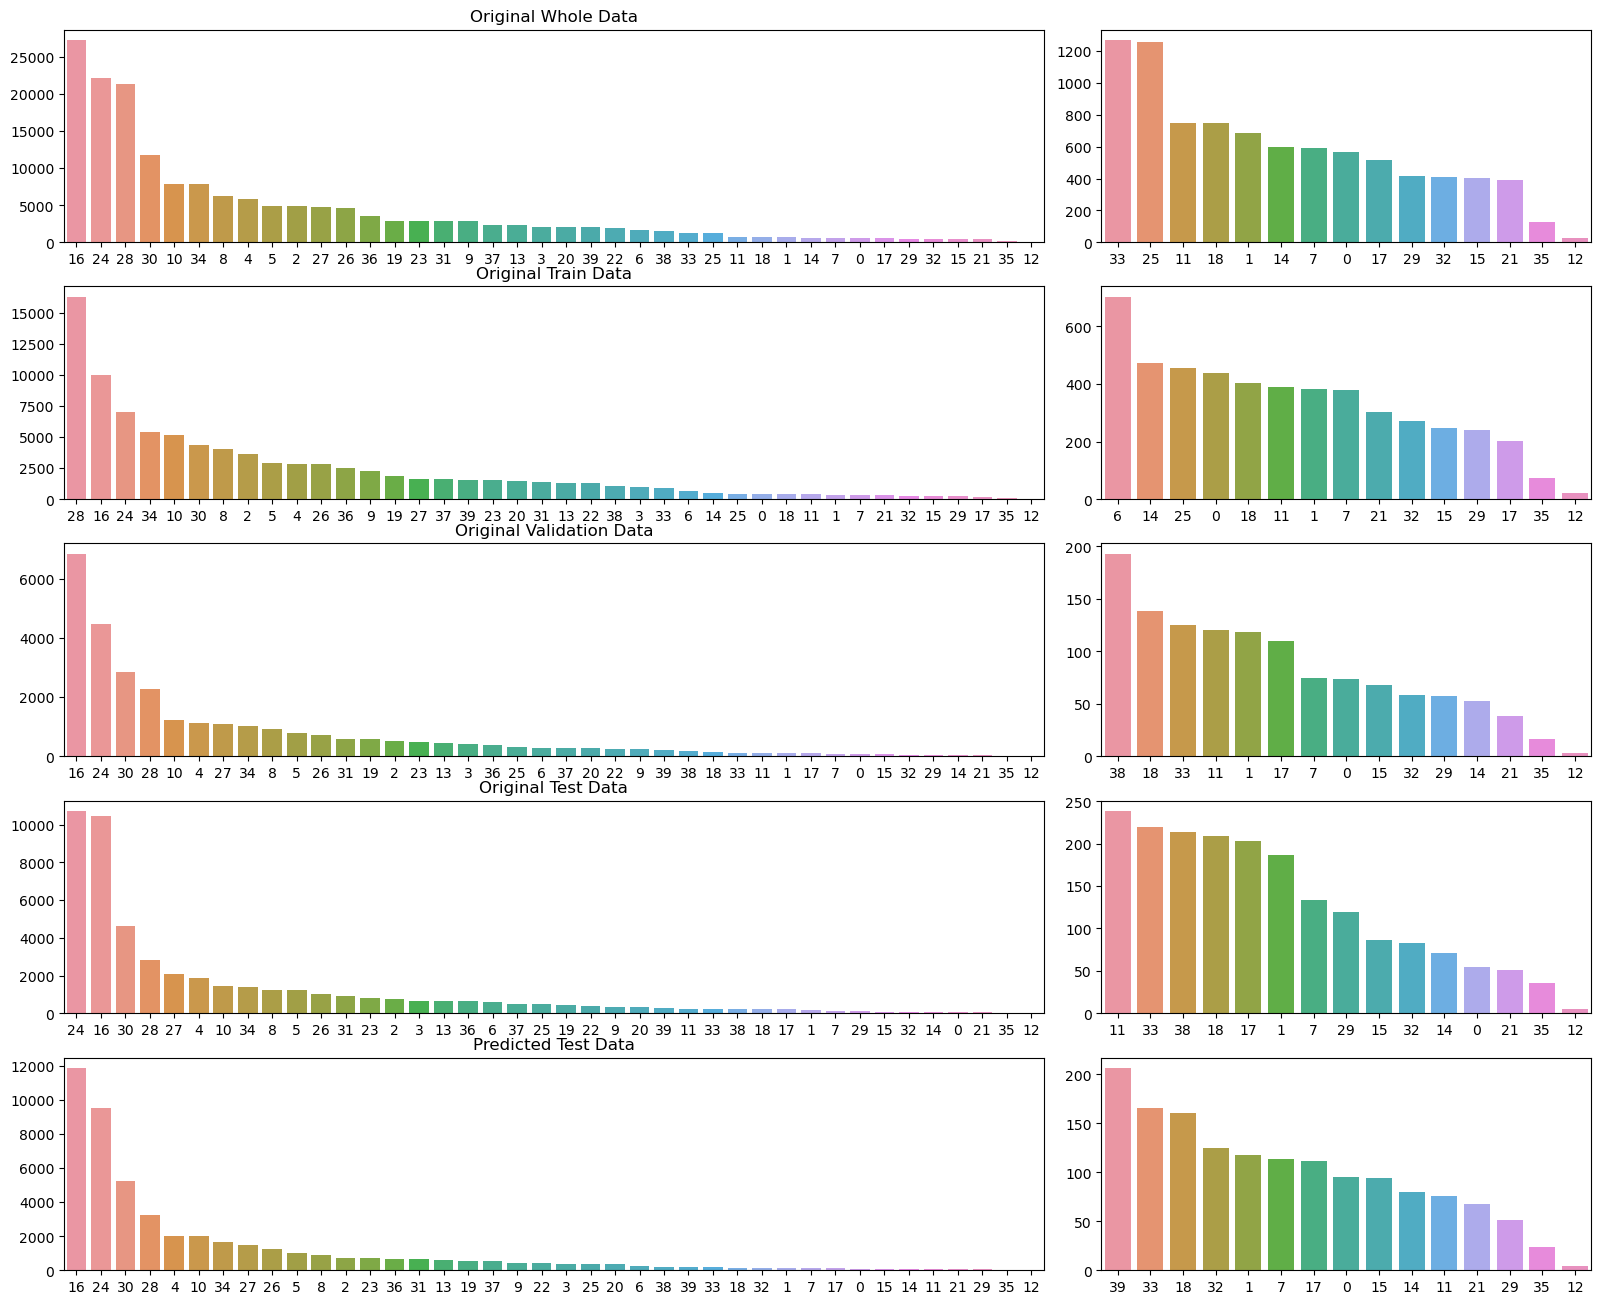

In [7]:
hist_plotter(labels, y_pred, train_mask, test_mask, val_mask)

### KDE Plot of OGB Products

In [16]:
from collections import Counter

In [17]:
train_dist = Counter(labels[train_mask].tolist())
val_dist = Counter(labels[val_mask].tolist())
test_dist = Counter(labels[test_mask].tolist())

train_freq = np.array([train_dist[i] for i in range(40)])
val_freq = np.array([val_dist[i] for i in range(40)])
test_freq = np.array([test_dist[i] for i in range(40)])

In [18]:
train, test = labels[train_mask].tolist(), labels[test_mask].tolist()

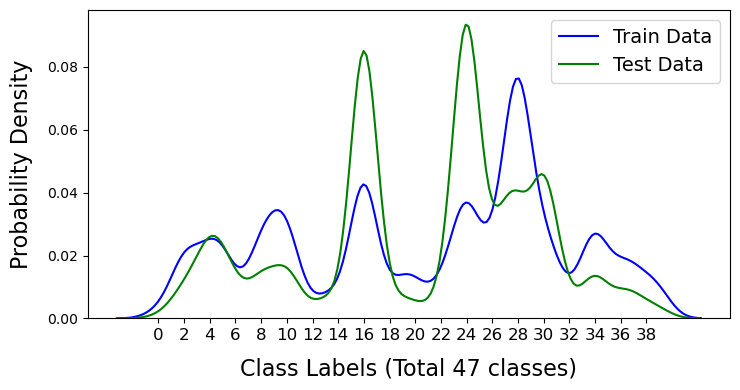

In [20]:
fig, ax = plt.subplots(figsize=[7.5, 4])

sns.kdeplot(train, fill=False, label="Train Data", c="b", alpha=1, lw=1.5)
# sns.kdeplot(labels[val_mask].tolist(), fill=True, label="validation Data", alpha=0.05, lw=2)
sns.kdeplot(test, fill=False, label="Test Data", color="green", alpha=1, lw=1.5)
plt.legend(fontsize=14)
# ax.yaxis.set_visible(False)
plt.xticks(range(0, 40, 2), fontsize=12)
plt.xlabel("Class Labels (Total 47 classes)", fontsize=16, labelpad=10)
plt.ylabel("Probability Density", fontsize=16, labelpad=10)
plt.tight_layout()
plt.savefig("ogb_prod_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()

###  
---

### Training (Base Model)

In [4]:
!python3 arxiv_experiments/node_classification_original.py --n_iter 5 --patience 20

2023-05-04 08:52:00.282925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 08:52:00.975971: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 2.5661 | Val Accuracy : 0.5139 | Epoch Time : 1s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 1.8467 | Val Accuracy : 0.5626 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 1.6629 | Val Accuracy : 0.5798 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 1.5738 | Val Accuracy : 0.5821 | Epoch Time : 0s | Patience   0/20
Iterati

### Run Choose Algorithm

In [9]:
!python3 node_classification_CNS_Sample.py --n_iter 5 --patience 20

2023-03-25 14:33:33.607526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 14:33:34.385434: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 1.2366 | Val Accuracy : 0.8579 | Epoch Time : 8s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 0.5770 | Val Accuracy : 0.8770 | Epoch Time : 7s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 0.4899 | Val Accuracy : 0.8849 | Epoch Time : 8s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 0.4450 | Val Accuracy : 0.8889 | Epoch Time : 9s | Patience   0/20
Iterati

In [1]:
!python3 node_classification_CNS_Sample.py --n_iter 5 --patience 20

2023-03-26 13:40:27.861132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 13:40:28.549586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 1.2935 | Val Accuracy : 0.8578 | Epoch Time : 5s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 0.5846 | Val Accuracy : 0.8782 | Epoch Time : 4s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 0.4871 | Val Accuracy : 0.8865 | Epoch Time : 4s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 0.4413 | Val Accuracy : 0.8905 | Epoch Time : 4s | Patience   0/20
Iterati

### Run Both Pick and Choose

In [23]:
!python3 arxiv_experiments/node_classification_PNC_CNS_Sample.py --n_iter 5 --patience 30

2023-05-04 11:30:10.449650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 11:30:11.133934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 3.6111 | Val Accuracy : 0.3184 | Epoch Time : 1s | Patience   0/30
Iteration : 1 | Epoch :  1 | Loss : 3.0559 | Val Accuracy : 0.4357 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  2 | Loss : 2.6310 | Val Accuracy : 0.4738 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  3 | Loss : 2.3527 | Val Accuracy : 0.4944 | Ep

In [24]:
!python3 arxiv_experiments/node_classification_PNC_CNS_Sample.py --n_iter 5 --patience 30

2023-05-04 12:01:30.322672: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 12:01:31.017625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 3.6026 | Val Accuracy : 0.2996 | Epoch Time : 1s | Patience   0/30
Iteration : 1 | Epoch :  1 | Loss : 3.0361 | Val Accuracy : 0.4366 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  2 | Loss : 2.6332 | Val Accuracy : 0.4601 | Epoch Time : 0s | Patience   0/30
Iteration : 1 | Epoch :  3 | Loss : 2.3405 | Val Accuracy : 0.5008 | Ep

### Run only Pick (Correct Implementation)

In [22]:
!python3 arxiv_experiments/node_classification_Pick_Correct.py  --n_iter 5 --patience 20

2023-05-04 11:14:22.170106: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 11:14:22.857284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 3.5924 | Val Accuracy : 0.3129 | Epoch Time : 1s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 3.0028 | Val Accuracy : 0.4366 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 2.5817 | Val Accuracy : 0.4765 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 2.3032 | Val Accuracy : 0.4839 | Ep

In [25]:
!python3 arxiv_experiments/node_classification_Pick_Correct.py  --n_iter 5 --patience 20

2023-05-04 12:04:44.871462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 12:04:45.579020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading OGB Products data...
Pick Probabilities Calculation Done...
----------------------------------------  Iteration 1  ----------------------------------------
Iteration : 1 | Epoch :  0 | Loss : 3.5746 | Val Accuracy : 0.3289 | Epoch Time : 1s | Patience   0/20
Iteration : 1 | Epoch :  1 | Loss : 3.0158 | Val Accuracy : 0.4497 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  2 | Loss : 2.5833 | Val Accuracy : 0.4923 | Epoch Time : 0s | Patience   0/20
Iteration : 1 | Epoch :  3 | Loss : 2.3185 | Val Accuracy : 0.5103 | Ep

### 
---

### Implement with GAT